import pandas as pd
import matp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [30]:
# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore")

In [6]:
df = pd.read_csv("./data/202306_202306_연령별인구현황_월간.csv",encoding="ms949",thousands=",")
df.head(1
        )

,행정구역,2023년06월_계_총인구수,2023년06월_계_연령구간인구수,2023년06월_계_0~9세,2023년06월_계_10~19세,2023년06월_계_20~29세,2023년06월_계_30~39세,2023년06월_계_40~49세,2023년06월_계_50~59세,2023년06월_계_60~69세,2023년06월_계_70~79세,2023년06월_계_80~89세,2023년06월_계_90~99세,2023년06월_계_100세 이상
0,서울특별시 (1100000000),9414093,9414093,528601,742606,1376043,1426858,1433451,1490305,1312500,725930,332435,43869,1495


#### 데이터 탐색

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3877 non-null   object
 1   2023년06월_계_총인구수     3877 non-null   object
 2   2023년06월_계_연령구간인구수  3877 non-null   object
 3   2023년06월_계_0~9세     3877 non-null   object
 4   2023년06월_계_10~19세   3877 non-null   object
 5   2023년06월_계_20~29세   3877 non-null   object
 6   2023년06월_계_30~39세   3877 non-null   object
 7   2023년06월_계_40~49세   3877 non-null   object
 8   2023년06월_계_50~59세   3877 non-null   object
 9   2023년06월_계_60~69세   3877 non-null   object
 10  2023년06월_계_70~79세   3877 non-null   object
 11  2023년06월_계_80~89세   3877 non-null   object
 12  2023년06월_계_90~99세   3877 non-null   object
 13  2023년06월_계_100세 이상  3877 non-null   object
dtypes: object(14)
memory usage: 424.2+ KB


In [8]:
# 기술요약통계

df.describe(include=object) 

,행정구역
count,3877
unique,3877
top,서울특별시 (1100000000)
freq,1


### 데이터 전처리

In [13]:
# 2023년06월_계_총인구수 => 총인구수
# 모든 컬럼명에 "2023년06월_계_" 제거

df.columns=df.columns.str.replace("2023년06월_계_","")

In [14]:
df.columns

Index(['행정구역', '총인구수', '연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'],
      dtype='object')

In [15]:
#컬럼 제거 - 총인구수, 연령구간 인구수
df.drop([],axis=1,inplace=True)

df.drop(columns=['총인구수', '연령구간인구수'],inplace=True)

In [18]:
df.head()

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울특별시 (1100000000),528601,742606,1376043,1426858,1433451,1490305,1312500,725930,332435,43869,1495
1,서울특별시 종로구 (1111000000),6110,10009,21836,19367,19459,24025,20556,11446,6619,934,36
2,서울특별시 종로구 청운효자동(1111051500),619,1119,1412,1556,1949,1902,1402,914,556,79,3
3,서울특별시 종로구 사직동(1111053000),489,664,1076,1428,1403,1500,1239,696,502,88,4
4,서울특별시 종로구 삼청동(1111054000),85,165,250,291,318,354,393,242,150,27,2


#### 특정 동 데이터 탐색

In [20]:
df[df["행정구역"]=="서울특별시 종로구 평창동(1111056000)"]

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1037,1525,2103,2080,2506,3159,2748,1360,815,133,10


In [21]:
df.loc[6]

행정구역       서울특별시 종로구 평창동(1111056000)
0~9세                            1037
10~19세                          1525
20~29세                          2103
30~39세                          2080
40~49세                          2506
50~59세                          3159
60~69세                          2748
70~79세                          1360
80~89세                           815
90~99세                           133
100세 이상                           10
Name: 6, dtype: object

In [35]:
# contains()

pc=df[df["행정구역"].str.contains("평창동")]
pc

,행정구역,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
6,서울특별시 종로구 평창동(1111056000),1037,1525,2103,2080,2506,3159,2748,1360,815,133,10


In [36]:
pc.drop(columns=["행정구역"],inplace=True)

In [43]:
pc=pc.T
pc

,6
0~9세,1037
10~19세,1525
20~29세,2103
30~39세,2080
40~49세,2506
50~59세,3159
60~69세,2748
70~79세,1360
80~89세,815
90~99세,133


In [44]:
pc.columns=["인구수"]

In [45]:
# 평창동 선차트
# 평창동 인구수
pc

,인구수
0~9세,1037
10~19세,1525
20~29세,2103
30~39세,2080
40~49세,2506
50~59세,3159
60~69세,2748
70~79세,1360
80~89세,815
90~99세,133


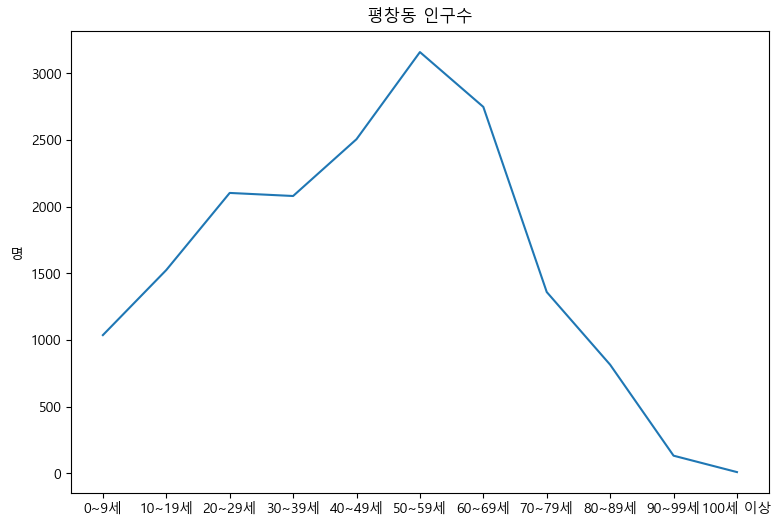

In [52]:

plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.ylabel("명",rotation=0,labelpad=10)
g=plt.plot(pc.index,pc["인구수"])


In [ ]:
plt.figure(figsize=(9,6))
plt.title("평창동 인구수")
plt.xlabel("명",rotation=0,labelpad=10)
g=plt.barh(pc.index,pc["인구수"])


In [70]:
dong = input("인구구조가 알고 싶은 지역의 이름(읍면동 단위)를 입력해 주세요")


In [ ]:
# contains()

pc2=df[df["행정구역"].str.contains(dong)]

pc2.drop(columns=["행정구역"],inplace=True)

pc2=pc2.T

pc2.columns=["인구수"]

plt.figure(figsize=(9,6))
plt.title(dong+" 인구수")
plt.xlabel("명",rotation=0,labelpad=10)
g=plt.barh(pc2.index,pc2["인구수"])
